- *Alumno*: Juan Puerta Gil de Gómez
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2021/2022
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# AED de la Base de Datos 'Pollution'

## Cargar la Base de Datos

En local, si no se dispone en windows del comando 'wget', el archivo se puede descargar directamente del enlace con el navegador: https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff. Incluir el mismo en el directorio donde está almacenado el notebook.

In [ ]:
# Funciona en linux y colab
!wget https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff -O pollution_sin_comentarios.arff #Funciona en linux

--2022-03-20 12:16:15--  https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff [following]
--2022-03-20 12:16:15--  https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340 (5.2K) [text/plain]
Saving to: ‘pollution_sin_comentarios.arff’

pollution_sin_comen 100%[===================>]   5.21K  --.-KB/s    in 0s      

2022-03-20 12:16:15 (42.5 MB/s) - ‘pollution_sin_comentarios.arff’ saved [

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

In [ ]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])
print(df_pollution.shape)
df_pollution.head()

(60, 16)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


In [ ]:
df_pollution.apply(lambda x: np.mean(np.abs(x-np.median(x))),axis=0)

PREC        7.366667
JANT        7.483333
JULT        3.750000
OVR65       1.178333
POPN        0.105167
EDUC        0.690000
HOUS        3.913333
DENS     1037.083333
NONW        6.880000
WWDRK       3.618333
POOR        2.793333
HC         30.283333
NOX        17.916667
SO@        41.033333
HUMID       3.500000
MORT       49.654667
dtype: float64

In [ ]:
X =  df_pollution.columns.values
X

array(['PREC', 'JANT', 'JULT', 'OVR65', 'POPN', 'EDUC', 'HOUS', 'DENS',
       'NONW', 'WWDRK', 'POOR', 'HC', 'NOX', 'SO@', 'HUMID', 'MORT',
       'class'], dtype=object)

## Análisis de distribución de los datos

### PREC

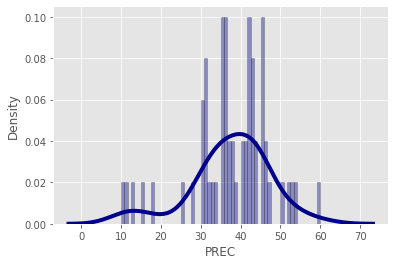

In [ ]:
sns.distplot(df_pollution.PREC, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

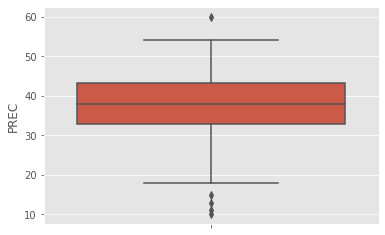

In [ ]:
sns.boxplot(y='PREC',data=df_pollution)

Shapiro-Wilk(0.9373189806938171, 0.004116666968911886)
D'Agostino's K-squared: p-value = 0.009386165616834667
Kursotis: 1.0807496185155712
Skewness: -0.7819857633010491


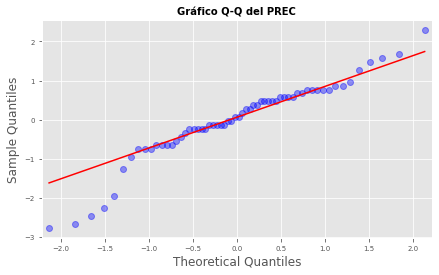

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.PREC,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del PREC', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.PREC)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.PREC)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.PREC))
print('Skewness:', stats.skew(df_pollution.PREC))

### JANT

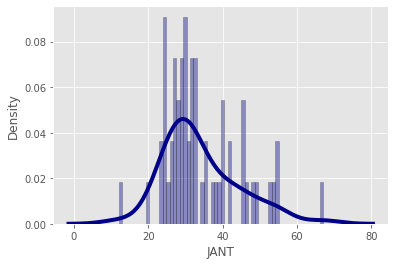

In [ ]:
sns.distplot(df_pollution.JANT, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

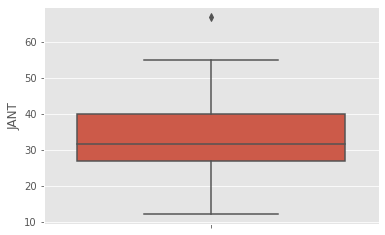

In [ ]:
sns.boxplot(y='JANT',data=df_pollution)

Shapiro-Wilk(0.9278152585029602, 0.0016062557697296143)
D'Agostino's K-squared: p-value = 0.004302561364402623
Kursotis: 0.9008995575254435
Skewness: 0.9365249329925672


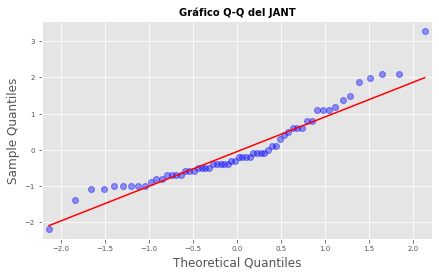

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.JANT,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del JANT', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.JANT)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.JANT)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.JANT))
print('Skewness:', stats.skew(df_pollution.JANT))

In [ ]:
print('Kursotis:', stats.kurtosis(df_pollution.JANT))
print('Skewness:', stats.skew(df_pollution.JANT))

Kursotis: 0.9008995575254435
Skewness: 0.9365249329925672


### JULT

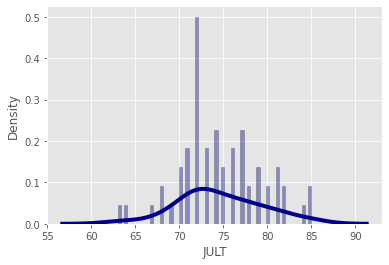

In [ ]:
sns.distplot(df_pollution.JULT, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

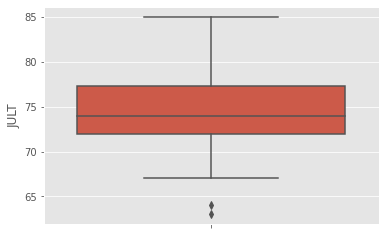

In [ ]:
sns.boxplot(y='JULT',data=df_pollution)

Shapiro-Wilk(0.9778433442115784, 0.34427037835121155)
D'Agostino's K-squared: p-value = 0.8752751587661161
Kursotis: -0.0883070488238058
Skewness: 0.13326411230368498


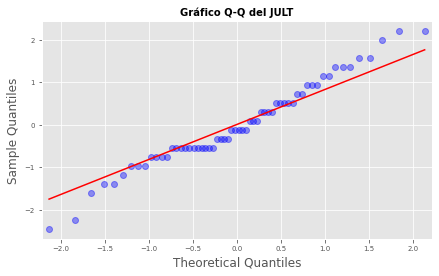

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.JULT,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del JULT', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.JULT)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.JULT)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.JULT))
print('Skewness:', stats.skew(df_pollution.JULT))

### OVR65

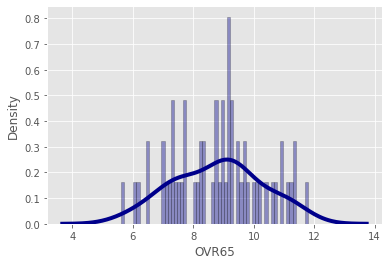

In [ ]:
sns.distplot(df_pollution.OVR65, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

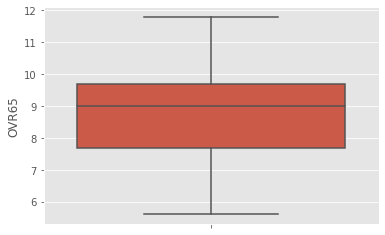

In [ ]:
sns.boxplot(y='OVR65',data=df_pollution)

Shapiro-Wilk(0.9835346937179565, 0.5944814085960388)
D'Agostino's K-squared: p-value = 0.500110828446932
Kursotis: -0.6528790256926071
Skewness: -0.033257102395556945


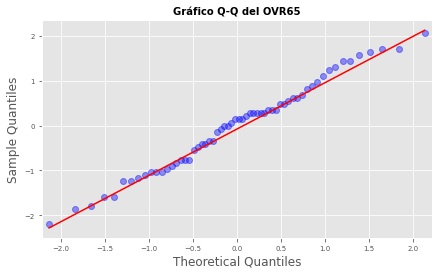

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.OVR65,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del OVR65', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.OVR65)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.OVR65)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.OVR65))
print('Skewness:', stats.skew(df_pollution.OVR65))

### POPN

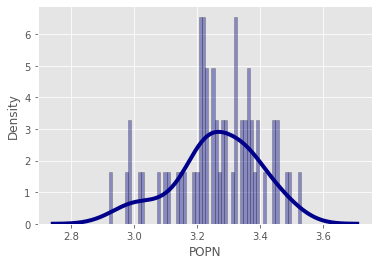

In [ ]:
sns.distplot(df_pollution.POPN, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

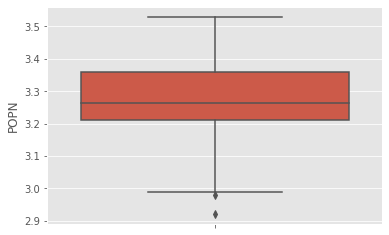

In [ ]:
sns.boxplot(y='POPN',data=df_pollution)

Shapiro-Wilk(0.9714487195014954, 0.17172197997570038)
D'Agostino's K-squared: p-value = 0.2679977495396162
Kursotis: -0.05808509017657926
Skewness: -0.4769973598004527


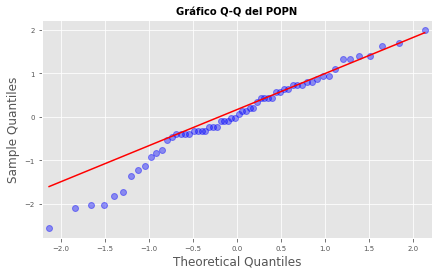

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.POPN,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del POPN', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.POPN)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.POPN)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.POPN))
print('Skewness:', stats.skew(df_pollution.POPN))

### EDUC

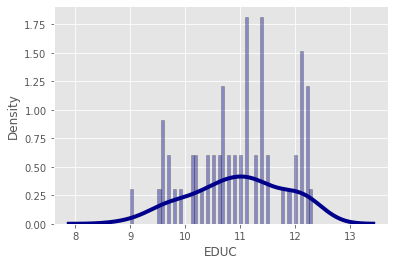

In [ ]:
sns.distplot(df_pollution.EDUC, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

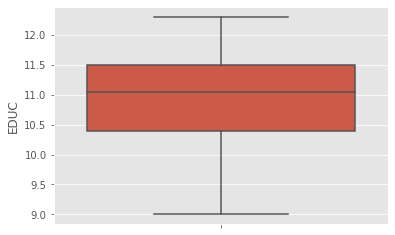

In [ ]:
sns.boxplot(y='EDUC',data=df_pollution)

Shapiro-Wilk(0.9607997536659241, 0.051484495401382446)
D'Agostino's K-squared: p-value = 0.1904714099034652
Kursotis: -0.7885174361930569
Skewness: -0.21926584397168625


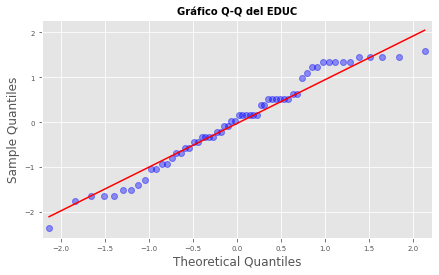

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.EDUC,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del EDUC', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.EDUC)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.EDUC)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.EDUC))
print('Skewness:', stats.skew(df_pollution.EDUC))

### HOUS

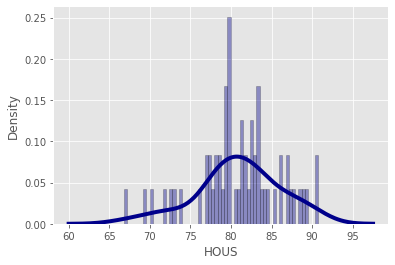

In [ ]:
sns.distplot(df_pollution.HOUS, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

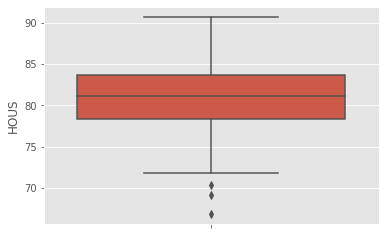

In [ ]:
sns.boxplot(y='HOUS',data=df_pollution)

Shapiro-Wilk(0.9745419025421143, 0.24189411103725433)
D'Agostino's K-squared: p-value = 0.28082193625299556
Kursotis: 0.2552212030317391
Skewness: -0.4065040511532251


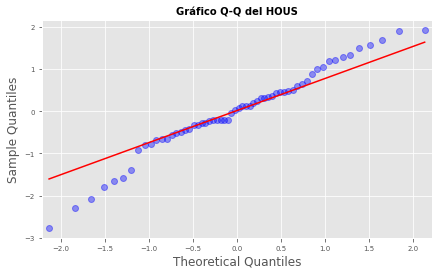

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.HOUS,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del HOUS', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.HOUS)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.HOUS)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.HOUS))
print('Skewness:', stats.skew(df_pollution.HOUS))

### DENS

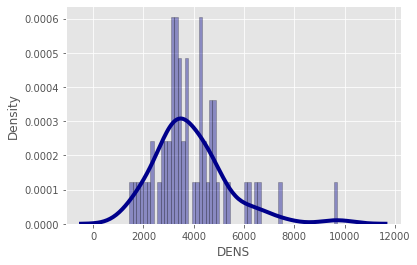

In [ ]:
sns.distplot(df_pollution.DENS, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

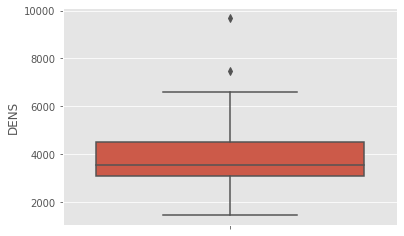

In [ ]:
sns.boxplot(y='DENS',data=df_pollution)

Shapiro-Wilk(0.9121226668357849, 0.0003749620809685439)
D'Agostino's K-squared: p-value = 5.205773499872448e-06
Kursotis: 3.200284280990645
Skewness: 1.344763259656465


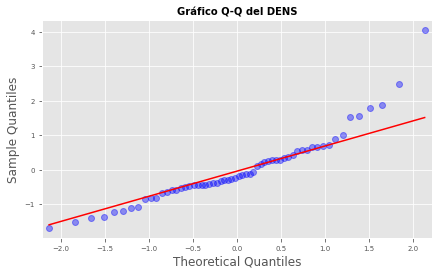

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.DENS,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del DENS', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.DENS)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.DENS)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.DENS))
print('Skewness:', stats.skew(df_pollution.DENS))

### NONW

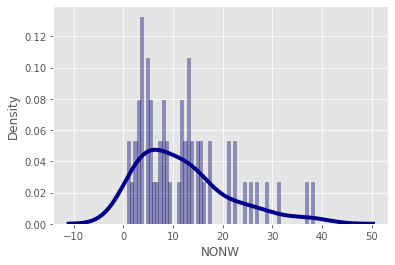

In [ ]:
sns.distplot(df_pollution.NONW, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

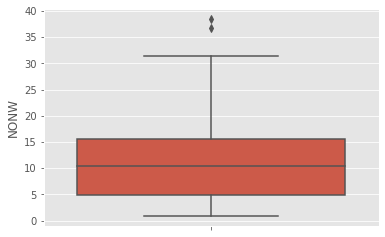

In [ ]:
sns.boxplot(y='NONW',data=df_pollution)

Shapiro-Wilk(0.8990238308906555, 0.00012121322652092203)
D'Agostino's K-squared: p-value = 0.001583489764970369
Kursotis: 0.761424331095323
Skewness: 1.1026514472645066


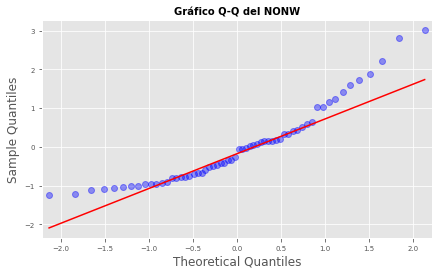

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.NONW,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NONW', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.NONW)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.NONW)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.NONW))
print('Skewness:', stats.skew(df_pollution.NONW))

### WWDRK

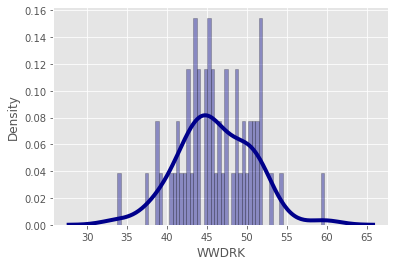

In [ ]:
sns.distplot(df_pollution.WWDRK, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

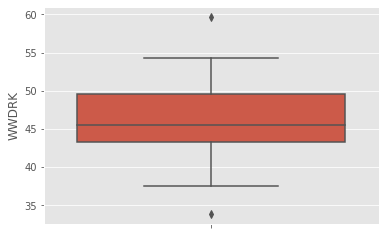

In [ ]:
sns.boxplot(y='WWDRK',data=df_pollution)

Shapiro-Wilk(0.988552987575531, 0.8467642068862915)
D'Agostino's K-squared: p-value = 0.55807499466593
Kursotis: 0.4113193243689879
Skewness: 0.09597673114681969


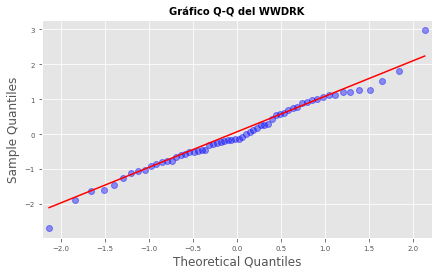

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.WWDRK,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del WWDRK', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.WWDRK)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.WWDRK)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.WWDRK))
print('Skewness:', stats.skew(df_pollution.WWDRK))

### POOR

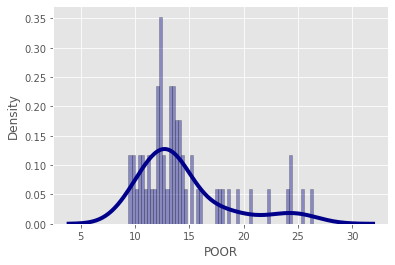

In [ ]:
sns.distplot(df_pollution.POOR, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

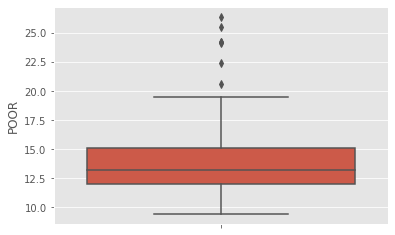

In [ ]:
sns.boxplot(y='POOR',data=df_pollution)

Shapiro-Wilk(0.8333138823509216, 1.0145201940758852e-06)
D'Agostino's K-squared: p-value = 5.3340332751567756e-05
Kursotis: 1.308411319734195
Skewness: 1.4266789442247871


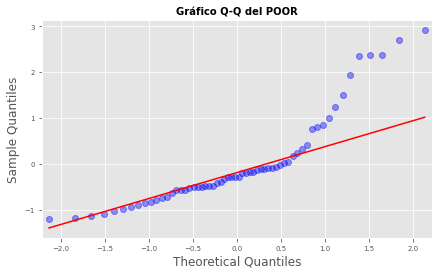

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.POOR,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del POOR', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.POOR)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.POOR)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.POOR))
print('Skewness:', stats.skew(df_pollution.POOR))

### HC

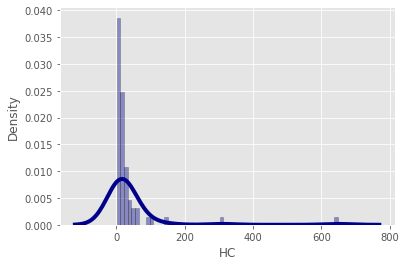

In [ ]:
sns.distplot(df_pollution.HC, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

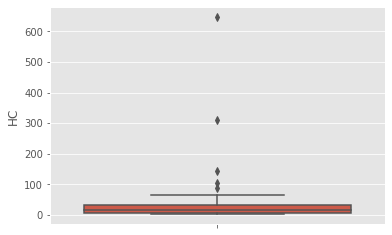

In [ ]:
sns.boxplot(y='HC',data=df_pollution)

In [ ]:
df_pollution['HC'].median()

14.5

In [ ]:
def deleteSpurio(m):
    if m > 200:
        return 14.5
    else:
        return m

df_pollution["HC"]=df_pollution["HC"].apply(deleteSpurio)

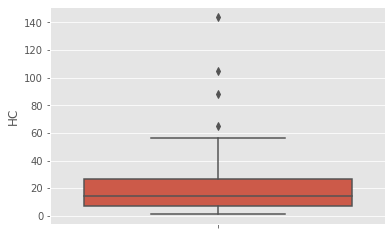

In [ ]:
sns.boxplot(y='HC',data=df_pollution)

Shapiro-Wilk(0.6859174966812134, 4.794935559715441e-10)
D'Agostino's K-squared: p-value = 6.630490196607134e-13
Kursotis: 8.576286133773282
Skewness: 2.733117308685284


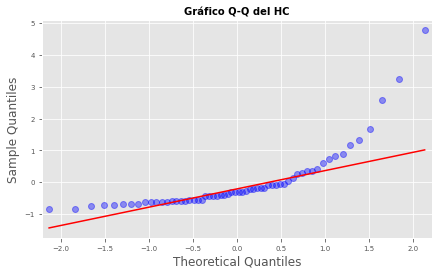

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.HC,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del HC', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.HC)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.HC)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.HC))
print('Skewness:', stats.skew(df_pollution.HC))

### NOX

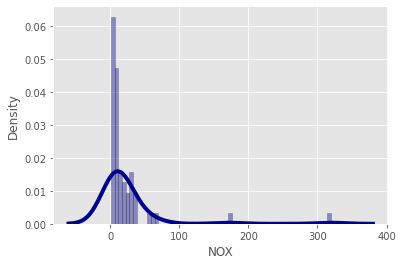

In [ ]:
sns.distplot(df_pollution.NOX, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

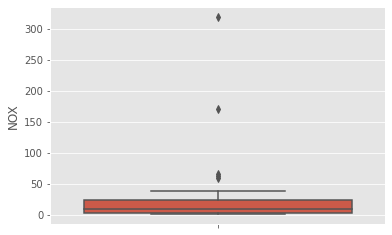

In [ ]:
sns.boxplot(y='NOX',data=df_pollution)

In [ ]:
df_pollution['NOX'].median()

9.0

In [ ]:
def deleteSpurio(m):
    if m > 150:
        return 9
    else:
        return m

df_pollution["NOX"]=df_pollution["NOX"].apply(deleteSpurio)

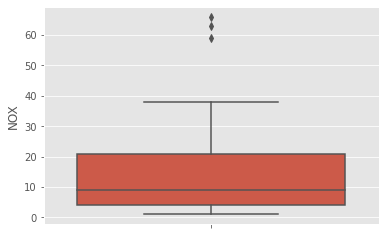

In [ ]:
sns.boxplot(y='NOX',data=df_pollution)

Shapiro-Wilk(0.7810826301574707, 4.697555766597361e-08)
D'Agostino's K-squared: p-value = 3.7969557492967645e-07
Kursotis: 2.817679695266488
Skewness: 1.7555831751368922


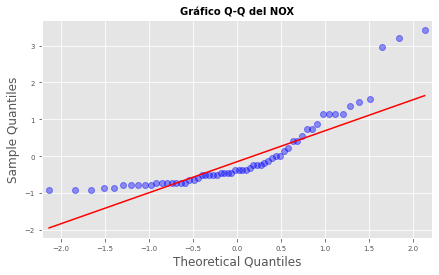

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.NOX,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NOX', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.NOX)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.NOX)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.NOX))
print('Skewness:', stats.skew(df_pollution.NOX))

### SO@

In [ ]:
#sns.distplot(df_pollution., hist=True, kde=True, 
#             bins=60, color = 'darkblue', 
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 4})

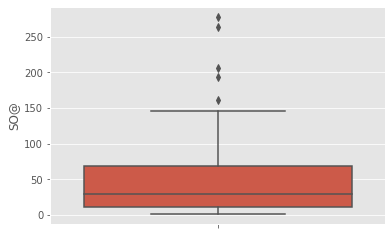

In [ ]:
sns.boxplot(y='SO@',data=df_pollution)

### HUMID

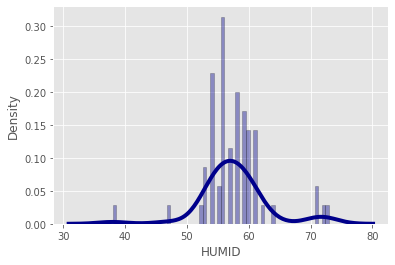

In [ ]:
sns.distplot(df_pollution.HUMID, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

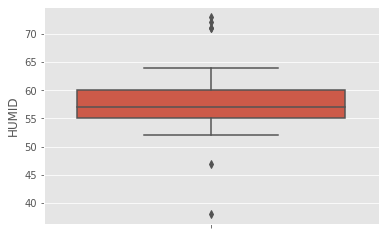

In [ ]:
sns.boxplot(y='HUMID',data=df_pollution)

Shapiro-Wilk(0.8627772331237793, 7.412981631205184e-06)
D'Agostino's K-squared: p-value = 0.002227447644604995
Kursotis: 3.8419231090496355
Skewness: 0.23152877876211303


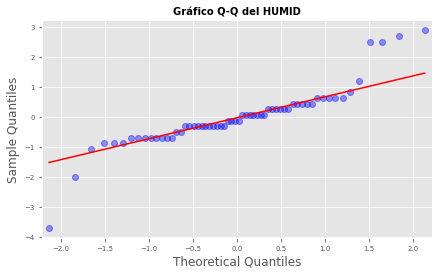

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.HUMID,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del HUMID', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.HUMID)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.HUMID)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.HUMID))
print('Skewness:', stats.skew(df_pollution.HUMID))

### MORT

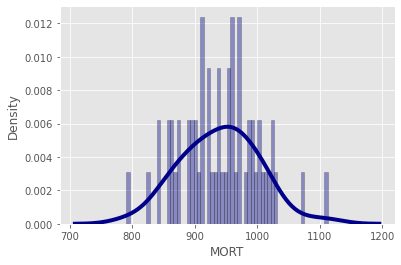

In [ ]:
sns.distplot(df_pollution.MORT, hist=True, kde=True, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

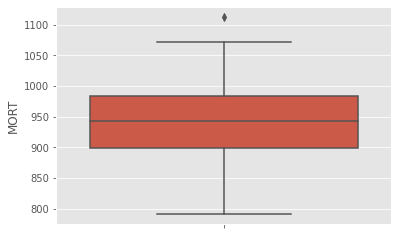

In [ ]:
sns.boxplot(y='MORT',data=df_pollution)

Shapiro-Wilk(0.9937466979026794, 0.9899877309799194)
D'Agostino's K-squared: p-value = 0.8419310733537764
Kursotis: 0.05166494323546722
Skewness: 0.09594158635166126


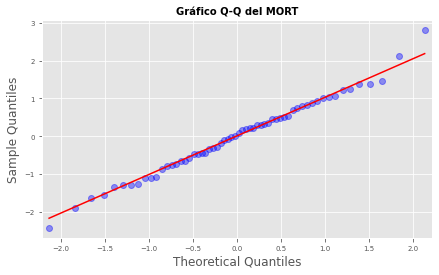

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_pollution.MORT,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del MORT', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

shapiro_test = stats.shapiro(df_pollution.MORT)
print("Shapiro-Wilk"+str(shapiro_test))
k2, p_value = stats.normaltest(df_pollution.MORT)
print("D'Agostino's K-squared: "+str(f"p-value = {p_value}"))
print('Kursotis:', stats.kurtosis(df_pollution.MORT))
print('Skewness:', stats.skew(df_pollution.MORT))

## Relación de pair plots y matrices de correlación

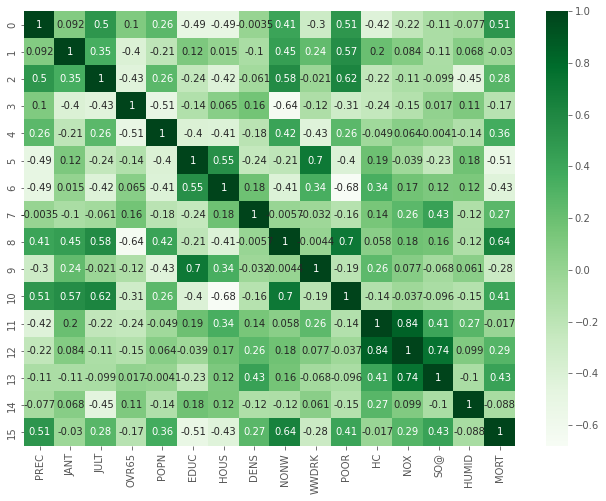

In [ ]:
corr = df_pollution[X].corr().reset_index(drop=True)
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

## Gráficos para los tres tipos de mortalidad

In [ ]:
def mortSeparat(m):
    if m < 900:
        return "BAJO"
    elif m >= 900 and m < 1000:
        return "MEDIO"
    elif m > 1000:
        return "ALTO"

In [ ]:
df_Aux=df_pollution
df_Aux = df_pollution["MORT"].apply(mortSeparat)

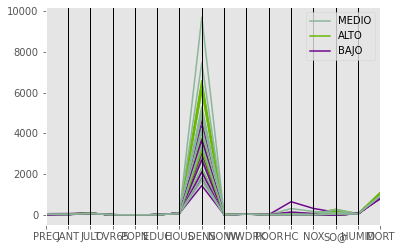

In [ ]:
df = pd.DataFrame(df_pollution)
df['class'] = df_Aux
pd.plotting.parallel_coordinates(df, class_column='class')

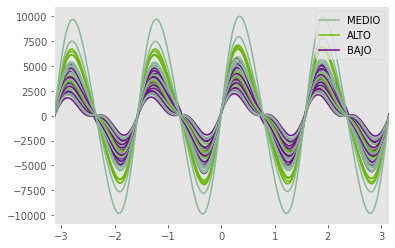

In [ ]:
pd.plotting.andrews_curves(df, class_column='class')

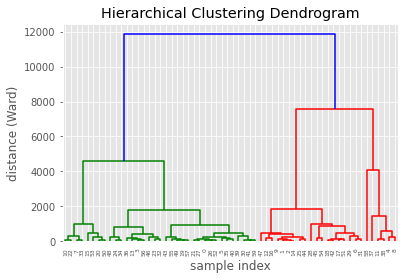

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import cluster
import numpy as np

# Matriz de distancias
Z = cluster.hierarchy.ward(df_pollution)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
den = cluster.hierarchy.dendrogram(Z, labels=df_pollution.index, leaf_rotation=90)
plt.show()

## Análisis de Componentes Principales

In [ ]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
datos = StandardScaler().fit_transform(df_pollution)
modelo_pca = PCA().fit(datos)
componentes_principales = pd.DataFrame(modelo_pca.components_, 
       columns=df_pollution.columns.values,
       index=['PC'+str(i+1) for i in range(datos.shape[1])])
display(componentes_principales)

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
PC1,-0.336695,-0.057553,-0.320576,0.155296,-0.285398,0.293791,0.345269,0.033467,-0.313794,0.196136,-0.344207,0.250798,0.226728,0.015787,0.109189,-0.294026
PC2,-0.113583,0.463602,0.167142,-0.344587,-0.077239,0.157534,0.065490,0.018034,0.363090,0.229178,0.247404,0.393455,0.395319,0.142727,-0.081814,0.079898
PC3,-0.001523,-0.179848,-0.168470,0.194812,-0.005597,-0.348163,0.011322,0.437103,0.009912,-0.269244,-0.080187,0.210785,0.280157,0.515166,-0.102580,0.333203
PC4,0.325508,0.330008,0.034811,0.524002,-0.548713,-0.142394,-0.161661,0.061519,-0.109637,0.009618,0.292025,0.072368,0.063750,-0.169239,0.140143,-0.055631
PC5,0.129198,-0.082768,0.392329,0.037212,-0.238237,0.144797,0.196922,0.419022,-0.012986,0.397236,-0.135515,-0.224042,-0.209517,0.101190,-0.497992,0.020337
PC6,-0.178372,-0.035248,0.169747,0.062652,0.060219,-0.173399,-0.132930,-0.193545,-0.230334,-0.300026,0.091335,0.215113,0.189961,-0.172927,-0.680707,-0.344009
PC7,0.001818,0.374027,0.098632,-0.252196,0.074733,-0.223083,0.425926,0.463218,-0.087002,-0.403410,-0.054628,-0.055164,-0.116704,-0.225641,0.167622,-0.257812
PC8,-0.507584,-0.079430,-0.092914,-0.111259,-0.019995,-0.108308,-0.553857,0.484874,-0.036584,0.235466,0.193519,-0.036276,-0.077655,-0.170582,0.112043,-0.133479
PC9,-0.267262,0.175167,0.268224,-0.045270,-0.147847,-0.190344,-0.023774,-0.259985,-0.196036,-0.006511,0.096085,-0.239851,-0.160630,0.675295,0.171548,-0.284885
PC10,0.364516,0.149127,-0.209435,0.154776,0.547269,-0.214853,-0.009991,0.090483,-0.059273,0.458158,0.018679,0.071916,0.074453,0.150071,-0.024116,-0.418962


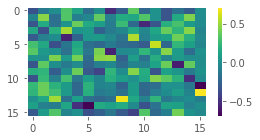

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')

plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.04912226e-01 1.72910901e-01 1.43279730e-01 8.44787715e-02
 7.64692130e-02 6.79211548e-02 4.13422662e-02 2.99640904e-02
 2.54688031e-02 1.53012432e-02 1.21311064e-02 9.77512245e-03
 7.30063336e-03 5.58027437e-03 2.87262501e-03 2.91838590e-04]


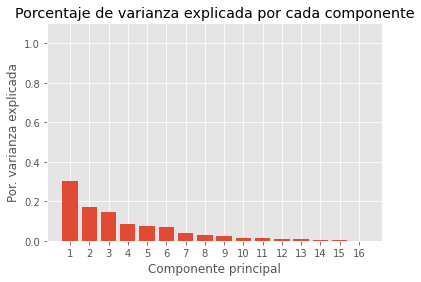

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)


ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Porcentajes de varianza explicados (acumulados): [0.30491223 0.47782313 0.62110286 0.70558163 0.78205084 0.849972
 0.89131426 0.92127835 0.94674716 0.9620484  0.97417951 0.98395463
 0.99125526 0.99683554 0.99970816 1.        ]


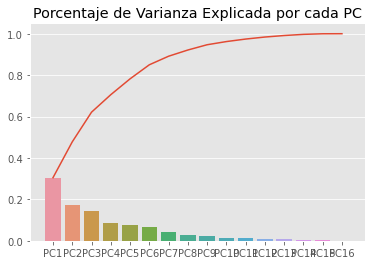

In [ ]:
fig = sns.barplot(x=['PC'+str(i+1) for i in range(datos.shape[1])],
            y=modelo_pca.explained_variance_ratio_).\
set_title("Porcentaje de Varianza Explicada por cada PC")
fig = sns.lineplot(x=['PC'+str(i+1) for i in range(datos.shape[1])],
            y=modelo_pca.explained_variance_ratio_.cumsum())
print('Porcentajes de varianza explicados (acumulados):',
      modelo_pca.explained_variance_ratio_.cumsum())

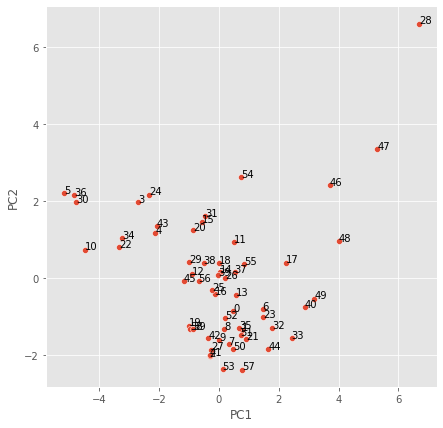

In [ ]:
proyeccion_pca = pd.DataFrame(modelo_pca.transform(datos),
  columns=['PC'+str(i+1) for i in range(datos.shape[1])],
  index=df_pollution.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.scatterplot(x='PC1',y='PC2',data=proyeccion_pca,ax=ax)
for i in range(len(proyeccion_pca)):
    ax.text(x=proyeccion_pca['PC1'].values[i], 
             y=proyeccion_pca['PC2'].values[i], 
             s=proyeccion_pca.index.values[i])

## Técnicas de proyección

In [ ]:
!python -m pip install trimap
!python -m pip install umap-learn

     |████████████████████████████████| 646 kB 5.4 MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391672 sha256=e8bfe095a9a7a19497e45ebbc77f89ec8962d4d35b94b7327f88c377e80b8428
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=8d16d1b4d3af78fc25a7d2eee8fec48d0802eecc28b584e46af5da72f169bdea
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=0afca951f55afe723f9e632779cc23e33dc242682cd7f29b206b589cac44789f
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Succ

In [ ]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])

In [ ]:
from trimap import TRIMAP
from umap.umap_ import UMAP
from sklearn.manifold import TSNE, Isomap

AttributeError: ignored

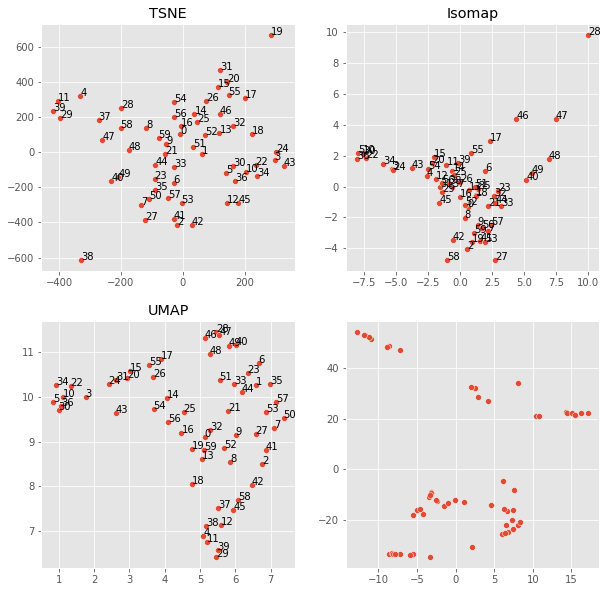

In [ ]:
datos = StandardScaler().fit_transform(df_pollution)
metodos = [TSNE(perplexity=7), Isomap(n_neighbors=7), 
           UMAP(n_neighbors=7), TRIMAP(n_inliers=7)]
fig, axs = plt.subplots(nrows=2, ncols=2, 
                        figsize=(10, 10))

for nm, metodo in enumerate(metodos):
    proyeccion = metodo.fit_transform(datos)
    sns.scatterplot(x=proyeccion[:,0],
                    y=proyeccion[:,1],
                    ax=axs[nm//2,nm%2]).\
        set_title(str(metodo).split('(')[0])
    for i in range(len(proyeccion_pca)):
        axs[nm//2,nm%2].text(x=proyeccion[i,0], 
                             y=proyeccion[i,1],
                s=df_pollution.index[i])

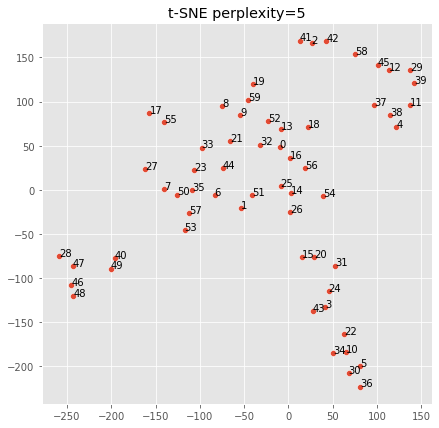

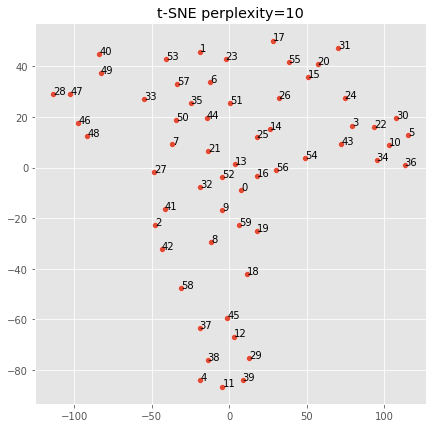

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.manifold import TSNE 
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = StandardScaler().fit_transform(df_pollution)
for perp in [5,10]:
    proyeccion = TSNE(perplexity=perp).fit_transform(datos)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    sns.scatterplot(x=proyeccion[:,0],y=proyeccion[:,1],ax=ax).\
        set_title(f't-SNE perplexity={perp}')
    for i in range(len(proyeccion_pca)):
        ax.text(x=proyeccion[i,0], y=proyeccion[i,1],
                s=df_pollution.index[i])

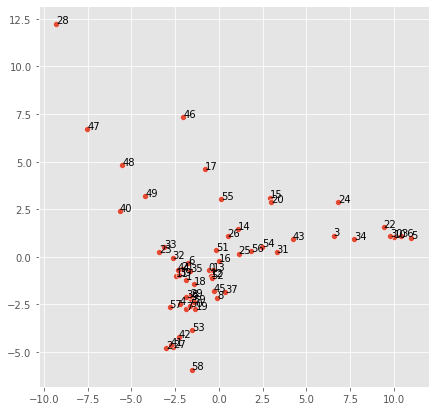

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.manifold import Isomap 
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = StandardScaler().fit_transform(df_pollution)
proyeccion = Isomap().fit_transform(datos)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.scatterplot(x=proyeccion[:,0],y=proyeccion[:,1],ax=ax)
for i in range(len(proyeccion_pca)):
    ax.text(x=proyeccion[i,0], y=proyeccion[i,1],
            s=df_pollution.index[i])

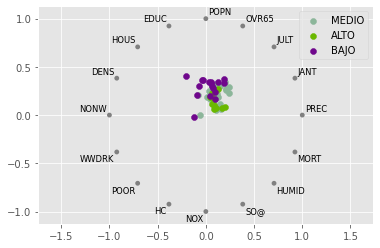

In [ ]:
pd.plotting.radviz(df, class_column='class')

## Dendograma

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import cluster
import numpy as np

# Matriz de distancias
Z = cluster.hierarchy.ward(df_pollution)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
den = cluster.hierarchy.dendrogram(Z, labels=df_pollution.index, leaf_rotation=90)
plt.show()